In [2]:
import pandas as pd
import numpy as np
pd.options.mode.chained_assignment = None  # default='warn'
import matplotlib.pyplot as plt
import folium

import folium.plugins # The Folium Javascript Map Library

In [3]:
df = pd.read_csv("/Users/Chris/Desktop/COOP/DOHMH_New_York_City_Restaurant_Inspection_Results.csv")
df.shape


(319818, 26)

In [4]:
df.columns

Index(['CAMIS', 'DBA', 'BORO', 'BUILDING', 'STREET', 'ZIPCODE', 'PHONE',
       'CUISINE DESCRIPTION', 'INSPECTION DATE', 'ACTION', 'VIOLATION CODE',
       'VIOLATION DESCRIPTION', 'CRITICAL FLAG', 'SCORE', 'GRADE',
       'GRADE DATE', 'RECORD DATE', 'INSPECTION TYPE', 'Latitude', 'Longitude',
       'Community Board', 'Council District', 'Census Tract', 'BIN', 'BBL',
       'NTA'],
      dtype='object')

In [5]:
df_filtered = df.loc[(df['Latitude'] != 0) | (df['Longitude'] != 0)]
df_filtered = df.dropna(subset=['Latitude', 'Longitude', 'SCORE', 'CUISINE DESCRIPTION'])
df_filtered.shape

(304656, 26)

In [6]:
def score_to_grade(score):
    if score >= 0 and score <= 13:
        return 'A'
    elif score >= 14 and score <= 27:
        return 'B'
    elif score >= 28:
        return 'C'
    else:
        return np.nan

In [7]:
missing_grades = df_filtered['GRADE'].isnull()

In [8]:
df_filtered.loc[missing_grades, "GRADE"] = df_filtered.loc[missing_grades, "GRADE"].apply(score_to_grade)

In [9]:
df_filtered["GRADE"].isna().any()

True

In [10]:
df_filtered = df_filtered.dropna(subset=["GRADE"])
df_filtered.shape

(160920, 26)

In [11]:
df_filtered.columns

Index(['CAMIS', 'DBA', 'BORO', 'BUILDING', 'STREET', 'ZIPCODE', 'PHONE',
       'CUISINE DESCRIPTION', 'INSPECTION DATE', 'ACTION', 'VIOLATION CODE',
       'VIOLATION DESCRIPTION', 'CRITICAL FLAG', 'SCORE', 'GRADE',
       'GRADE DATE', 'RECORD DATE', 'INSPECTION TYPE', 'Latitude', 'Longitude',
       'Community Board', 'Council District', 'Census Tract', 'BIN', 'BBL',
       'NTA'],
      dtype='object')

In [12]:
df_filtered["CUISINE DESCRIPTION"].unique()

array(['Spanish', 'Seafood', 'American', 'Chinese', 'Hamburgers',
       'Caribbean', 'Brazilian', 'Coffee/Tea', 'Latin American',
       'Sandwiches', 'Korean', 'Bakery Products/Desserts', 'Pizza',
       'Bagels/Pretzels', 'Donuts', 'Other', 'Jewish/Kosher', 'Irish',
       'Tapas', 'Japanese', 'Bottled Beverages', 'Afghan',
       'Juice, Smoothies, Fruit Salads', 'Southeast Asian', 'Steakhouse',
       'Mexican', 'Russian', 'Filipino', 'Chicken', 'Eastern European',
       'Sandwiches/Salads/Mixed Buffet', 'Indian', 'Thai', 'Italian',
       'Soups/Salads/Sandwiches', 'Tex-Mex', 'Greek', 'Mediterranean',
       'Salads', 'Indonesian', 'German', 'Hotdogs', 'Bangladeshi',
       'Asian/Asian Fusion', 'French', 'Australian', 'Middle Eastern',
       'Scandinavian', 'Frozen Desserts', 'Chinese/Japanese', 'Creole',
       'Pakistani', 'Peruvian', 'Egyptian', 'African', 'Creole/Cajun',
       'Turkish', 'English', 'Soul Food', 'Vegan', 'Vegetarian',
       'Barbecue', 'Chinese/Cuban', 'C

In [13]:
drop_these = ['Bottled Beverages',  'Sandwiches/Salads/Mixed Buffet', 'Chicken', 'Coffee/Tea',
'Not Listed/Not Applicable','Soups', 'Vegetarian', 'Nuts/Confectionary', 'Vegan', 'Juice, Smoothies, Fruit Salads',
'Bakery Products/Desserts', 'Frozen Desserts','Steakhouse','Seafood', 'Sandwiches', 'Soups/Salads/Sandwiches',
'Salads', 'Asian/Asian Fusion', 'Fruits/Vegetables']
turn_American = ['Tex-Mex', 'Bagels/Pretzels', 'Donuts', 'Soul Food', 'Creole', 'Hotdogs', "Pancakes/Waffles"
                'Continental', 'Cajun', 'Southwestern', 'Hotdogs/Pretzels', 'Fusion', 'Californian', 'Hamburgers'
                'Pizza', 'Hawaiian', 'Barbecue']

In [14]:
df_filtered = df_filtered[~df_filtered["CUISINE DESCRIPTION"].isin(drop_these)]


In [15]:
df_filtered['CUISINE DESCRIPTION'] = df_filtered["CUISINE DESCRIPTION"].apply(lambda row: "American" if row in turn_American else row)
df_filtered['CUISINE DESCRIPTION'].unique()

array(['Spanish', 'American', 'Chinese', 'Hamburgers', 'Caribbean',
       'Brazilian', 'Latin American', 'Korean', 'Pizza', 'Other',
       'Jewish/Kosher', 'Irish', 'Tapas', 'Japanese', 'Afghan',
       'Southeast Asian', 'Mexican', 'Russian', 'Filipino',
       'Eastern European', 'Indian', 'Thai', 'Italian', 'Greek',
       'Mediterranean', 'Indonesian', 'German', 'Bangladeshi', 'French',
       'Australian', 'Middle Eastern', 'Scandinavian', 'Chinese/Japanese',
       'Pakistani', 'Peruvian', 'Egyptian', 'African', 'Creole/Cajun',
       'Turkish', 'English', 'Chinese/Cuban', 'Continental',
       'Pancakes/Waffles', 'Polish', 'Portuguese', 'Ethiopian', 'Iranian',
       'Moroccan', 'Lebanese', 'New French', 'New American', 'Czech',
       'Chilean', 'Armenian', 'Basque'], dtype=object)

In [16]:
#No idea why some of the turn_American foods is not getting turned American
df_filtered.loc[df_filtered["CUISINE DESCRIPTION"].str.contains("Pancakes/Waffles", case=False), "CUISINE DESCRIPTION"] = "American"
df_filtered.loc[df_filtered["CUISINE DESCRIPTION"].str.contains("New French", case=False), "CUISINE DESCRIPTION"] = "French"
df_filtered.loc[df_filtered["CUISINE DESCRIPTION"].str.contains("Tapas", case=False), "CUISINE DESCRIPTION"] = "Spanish"
df_filtered.loc[df_filtered["CUISINE DESCRIPTION"].str.contains("Continental", case=False), "CUISINE DESCRIPTION"] = "American"
df_filtered.loc[df_filtered["CUISINE DESCRIPTION"].str.contains('Creole/Cajun', case=False), "CUISINE DESCRIPTION"] = "American"
df_filtered.loc[df_filtered["CUISINE DESCRIPTION"].str.contains('Chinese/Japanese', case=False), "CUISINE DESCRIPTION"] = 'Other'
df_filtered.loc[df_filtered["CUISINE DESCRIPTION"].str.contains('Chinese/Cuban', case=False), "CUISINE DESCRIPTION"] = 'Other'
df_filtered.loc[df_filtered["CUISINE DESCRIPTION"].str.contains('Pizza', case=False), "CUISINE DESCRIPTION"] = 'American'


In [17]:
df_filtered['CUISINE DESCRIPTION'].unique()

array(['Spanish', 'American', 'Chinese', 'Hamburgers', 'Caribbean',
       'Brazilian', 'Latin American', 'Korean', 'Other', 'Jewish/Kosher',
       'Irish', 'Japanese', 'Afghan', 'Southeast Asian', 'Mexican',
       'Russian', 'Filipino', 'Eastern European', 'Indian', 'Thai',
       'Italian', 'Greek', 'Mediterranean', 'Indonesian', 'German',
       'Bangladeshi', 'French', 'Australian', 'Middle Eastern',
       'Scandinavian', 'Pakistani', 'Peruvian', 'Egyptian', 'African',
       'Turkish', 'English', 'Polish', 'Portuguese', 'Ethiopian',
       'Iranian', 'Moroccan', 'Lebanese', 'New American', 'Czech',
       'Chilean', 'Armenian', 'Basque'], dtype=object)

In [18]:
df_filtered.reset_index(drop = True)

,CAMIS,DBA,BORO,BUILDING,STREET,ZIPCODE,PHONE,CUISINE DESCRIPTION,INSPECTION DATE,ACTION,...,RECORD DATE,INSPECTION TYPE,Latitude,Longitude,Community Board,Council District,Census Tract,BIN,BBL,NTA
0,50016943,EL NUEVO ROBLE BILLIARDS,Bronx,216,EAST 170 STREET,10456.0,3478206981,Spanish,06/08/2019,Violations were cited in the following area(s).,...,04/03/2022,Cycle Inspection / Re-inspection,40.838388,-73.912939,204.0,16.0,17902.0,2007983.0,2.028310e+09,BX14
1,50078976,YARDS BAR & GRILL,Queens,2632,SKILLMAN AVE,11101.0,9179751495,American,02/15/2022,Violations were cited in the following area(s).,...,04/03/2022,Cycle Inspection / Initial Inspection,40.744053,-73.941197,402.0,26.0,100.0,4000738.0,4.000960e+09,QN31
2,50106489,BITES OF XI'AN,Manhattan,84,EAST 10 STREET,10003.0,9174095535,Chinese,01/26/2022,Violations were cited in the following area(s).,...,04/03/2022,Pre-permit (Operational) / Re-inspection,40.731024,-73.989807,103.0,2.0,4200.0,1077211.0,1.005550e+09,MN22
3,40388672,NECTAR OF 82ND STREET,Manhattan,1090,MADISON AVENUE,10028.0,2127720916,American,07/22/2021,Violations were cited in the following area(s).,...,04/03/2022,Cycle Inspection / Initial Inspection,40.778129,-73.960813,108.0,4.0,14200.0,1046733.0,1.014938e+09,MN40
4,50018268,MCDONALD'S,Staten Island,1815,FOREST AVENUE,10303.0,7187206907,Hamburgers,12/12/2017,Violations were cited in the following area(s).,...,04/03/2022,Cycle Inspection / Initial Inspection,40.625179,-74.149370,501.0,49.0,23900.0,5026992.0,5.011800e+09,SI12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127316,40364691,THE GEORGIAN SUITE KITCHEN,Manhattan,1A,EAST 77 STREET,10075.0,2127341468,American,01/24/2019,Violations were cited in the following area(s).,...,04/03/2022,Cycle Inspection / Initial Inspection,40.775578,-73.964443,108.0,4.0,14200.0,1041816.0,1.013920e+09,MN40
127317,41172672,WENG'S PALACE,Manhattan,304,WEST 40 STREET,10018.0,2128686868,Chinese,03/02/2022,Violations were cited in the following area(s).,...,04/03/2022,Cycle Inspection / Re-inspection,40.756150,-73.991240,104.0,3.0,11500.0,1082926.0,1.007630e+09,MN15
127318,50076259,BANHMIGOS,Brooklyn,178,LINCOLN PLACE,11217.0,7183993812,Southeast Asian,06/10/2019,Violations were cited in the following area(s).,...,04/03/2022,Cycle Inspection / Re-inspection,40.675506,-73.974054,306.0,39.0,15900.0,3341657.0,3.010610e+09,BK37
127319,50063902,THEATER RESTAURANT BOULEVARD,Queens,8222,NORTHERN BLVD,11372.0,7186512797,American,03/04/2020,Violations were cited in the following area(s).,...,04/03/2022,Cycle Inspection / Initial Inspection,40.755571,-73.885081,403.0,25.0,28300.0,4440874.0,4.014300e+09,QN28


In [19]:
df_filtered["BORO"].unique()

array(['Bronx', 'Queens', 'Manhattan', 'Staten Island', 'Brooklyn'],
      dtype=object)

Text(0.5, 1.0, 'NY Cuisine')

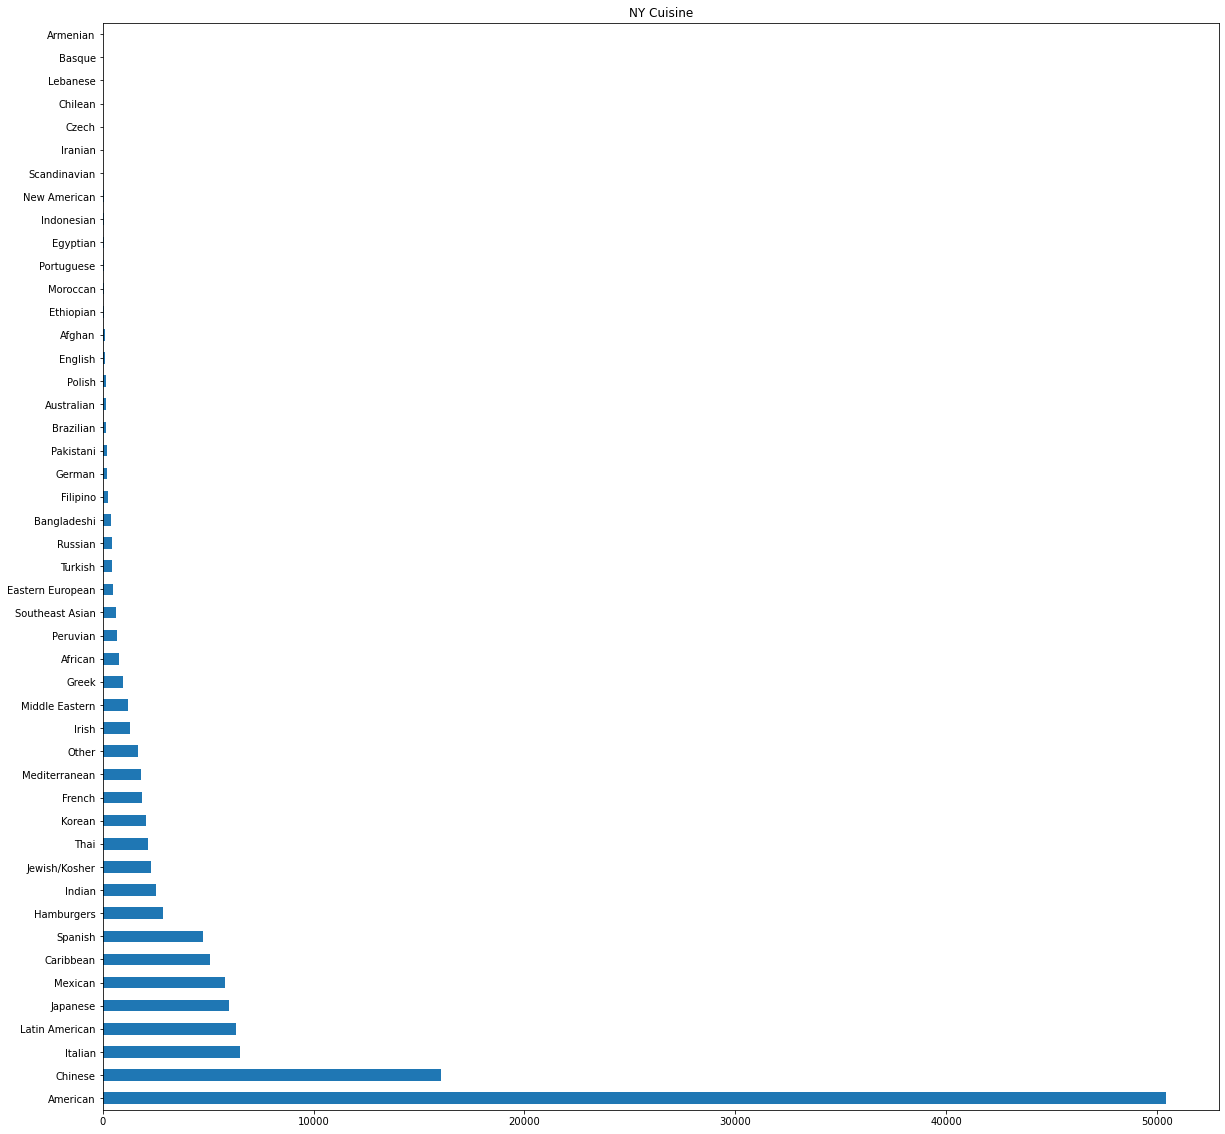

In [20]:
value_counts = df_filtered['CUISINE DESCRIPTION'].value_counts()
ax = value_counts.plot(kind='barh',figsize=(20,20))
ax.set_title("NY Cuisine")


Text(0.5, 1.0, 'NY Cuisine')

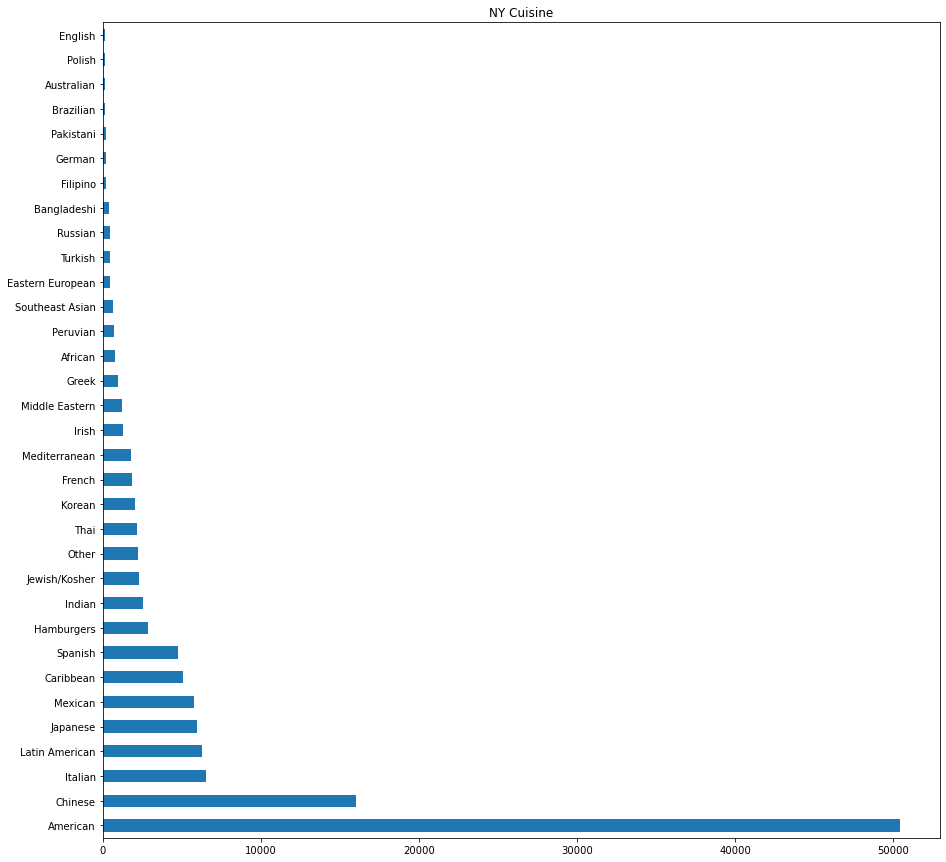

In [21]:
small_cuisine = ['Armenian', 'Basque', 'Lebanese', 'Chilean', 'Czech', 'Iranian', 'Scandinavian', 'New American',
                 'Indonesian', 'Egyptian', 'Portuguese', 'Moroccan', 'Ethiopian', 'Afghan']
replace = "Other"
replace_dict = {val: replace for val in small_cuisine}
df_filtered['CUISINE DESCRIPTION'] = df_filtered['CUISINE DESCRIPTION'].replace(replace_dict)
count_cuisines = df_filtered['CUISINE DESCRIPTION'].value_counts()
cleaned = count_cuisines.plot(kind='barh',figsize=(15,15))
cleaned.set_title("NY Cuisine")

In [22]:
df_filtered.to_csv("more_filtered_ny.csv")

In [23]:
df_filtered.loc[df_filtered["CUISINE DESCRIPTION"] == "Chinese"][['Latitude','Longitude']]

,Latitude,Longitude
7,40.731024,-73.989807
23,40.631814,-74.012837
51,40.625468,-74.030249
58,40.718786,-74.001053
79,40.624869,-74.143332
...,...,...
319743,40.637524,-74.006849
319767,40.697534,-73.936269
319798,40.600732,-73.753996
319800,40.613129,-74.121880


In [25]:
NY_COORDINATES = (40.7128, 74.006)
ny_map = folium.Map(location=NY_COORDINATES, zoom_start=13)
chinese_locs = df_filtered.loc[df_filtered["CUISINE DESCRIPTION"] == "Chinese"][['Latitude','Longitude']]
locs = chinese_locs.to_numpy()

In [26]:
heatmap = folium.plugins.HeatMap(locs.tolist(), radius = 10)
ny_map.add_child(heatmap)

In [28]:
NY_COORDINATES = (40.7128, 74.006)
ny_map = folium.Map(location=NY_COORDINATES, zoom_start=13)
italian_locs = df_filtered.loc[df_filtered["CUISINE DESCRIPTION"] == "Italian"][['Latitude','Longitude']]
italian_locs = italian_locs.to_numpy()

In [29]:
heatmap = folium.plugins.HeatMap(italian_locs.tolist(), radius = 10)
ny_map.add_child(heatmap)

In [31]:
NY_COORDINATES = (40.7128, 74.006)
ny_map = folium.Map(location=NY_COORDINATES, zoom_start=13)
japanese_locs = df_filtered.loc[df_filtered["CUISINE DESCRIPTION"] == "Japanese"][['Latitude','Longitude']]
japanese_locs = japanese_locs.to_numpy()

In [32]:
heatmap = folium.plugins.HeatMap(japanese_locs.tolist(), radius = 10)
ny_map.add_child(heatmap)

In [38]:
NY_COORDINATES = (40.7128, 74.006)
latin_map = folium.Map(location=NY_COORDINATES, zoom_start=13)
latin_locs = df_filtered.loc[df_filtered["CUISINE DESCRIPTION"] == "Latin American"][['Latitude','Longitude']]
latin_locs = latin_locs.to_numpy()

In [39]:
heatmap = folium.plugins.HeatMap(latin_locs.tolist(), radius = 10)
latin_map.add_child(heatmap)
latin_map.save("latin_ny.html")